# Pandas biblioteka

**Pandas** je Python biblioteka namenjena radu sa podacima. Na [ovom](https://pandas.pydata.org/) linku se nalazi zvanicna stranica, a [ovde](http://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html) se moze pronaci koristan tutorijal.

In [2]:
import numpy as np
import pandas as pd

## Series

**Series** su strukture podataka koje odgovaraju vektorima (jednodimenzionim nizovima), sa pridruzenim obelezjima (indeksima).

In [3]:
s = pd.Series([2, 3, 4, 53, -3, 12])
print(s)

0     2
1     3
2     4
3    53
4    -3
5    12
dtype: int64


In [5]:
print('Elementi: {}'.format(s.values))
print('Indeksi: {}'.format(s.index))

Elementi: [ 2  3  4 53 -3 12]
Indeksi: RangeIndex(start=0, stop=6, step=1)


In [6]:
# Prilikom kreiranja serije, indeks se moze eksplicitno zadati
s = pd.Series([2, 3, 5, 7, 12], index = ['a','b','c', 'd', 'e'])
print(s)

a     2
b     3
c     5
d     7
e    12
dtype: int64


In [9]:
# Prilikom kreiranja serije moguce je koristiti recnik
data = {'a' : 0., 'b' : 1., 'c' : 2.}
s = pd.Series(data)
print(s)

a    0.0
b    1.0
c    2.0
dtype: float64


In [13]:
# Prilikom kreiranja serije, moguce je i eksplicitno navodjenje nedostajucih vrednosti
s = pd.Series([1, 2, np.nan, np.nan, 45, -4, np.nan, -9])
print(s)

0     1.0
1     2.0
2     NaN
3     NaN
4    45.0
5    -4.0
6     NaN
7    -9.0
dtype: float64


In [15]:
# Moguce je kreirati seriju na osnovu skalara
s = pd.Series(5, index=[0, 1, 2, 3])
print(s)

0    5
1    5
2    5
3    5
dtype: int64


In [16]:
# Prilikom kreiranja serije moguce je eksplcitno baratati indeksima
data = {'a' : 0., 'b' : 1., 'c' : 2.}
s = pd.Series(data,index=['b','c','d','a'])
print(s)

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64


In [17]:
# Pristup elementima serije je moguc na osnovu pridruzenih indeksa
print('Element sa indeksom "b":', s['b'])
print('Element sa indeksom "c":', s['c'])

Element sa indeksom "b": 1.0
Element sa indeksom "c": 2.0


In [18]:
# Pristup elementima - vise elemenata
s = pd.Series([1,2,3,4,5],index = ['a','b','c','d','e'])
print(s[['a','c','d']])

a    1
c    3
d    4
dtype: int64


In [19]:
# Pristup elementima - indeks koji nije validan (Exception is raised)
s = pd.Series([1,2,3,4,5],index = ['a','b','c','d','e'])
print(s['f'])

KeyError: ignored

In [20]:
# Pristup elementima pomocu indeksa
s = pd.Series([1,2,3,4,5],index = ['a','b','c','d','e'])
print(s[0])

1


In [21]:
# Pristup elementima pomocu indeksa - vise elemenata
s = pd.Series([1,2,3,4,5],index = ['a','b','c','d','e'])
print(s[3:])

d    4
e    5
dtype: int64


In [22]:
# Pristup elementima pomocu indeksa - vise elemenata
s = pd.Series([1,2,3,4,5],index = ['a','b','c','d','e'])
print(s[:-3])

a    1
b    2
dtype: int64


## DataFrame

**DataFrame** su strukture podataka koji odgovaraju tabelarnim podacima sa pridruženim obeležjima (indeksima). Sastoje se od Series struktura.

In [27]:
df = pd.DataFrame({
    'ime': ['Ana', 'Laza', 'Maja', 'Goran'],
    'godine': [20, 22, 30, 27],
    'grad': ['BG', 'NS', 'NS', 'NI']
})
print(df)
print(df.shape)

     ime  godine grad
0    Ana      20   BG
1   Laza      22   NS
2   Maja      30   NS
3  Goran      27   NI
(4, 3)


In [28]:
# Formatiran ispis u cellu
df

,ime,godine,grad
0,Ana,20,BG
1,Laza,22,NS
2,Maja,30,NS
3,Goran,27,NI


In [29]:
# U praksi su skupovi podataka nesto vecih velicina pa se cesto ispisuje svega nekoliko prvih vrsta
df.head(2)

,ime,godine,grad
0,Ana,20,BG
1,Laza,22,NS


In [31]:
# Pristup indeksima
print('Indeksi vrsta:', df.index)
print('Indeksi kolona:', df.columns)

Indeksi vrsta: RangeIndex(start=0, stop=4, step=1)
Indeksi kolona: Index(['ime', 'godine', 'grad'], dtype='object')


In [32]:
# Citanje serije (kolone)
print('Imena:')
df.ime

Imena:


0      Ana
1     Laza
2     Maja
3    Goran
Name: ime, dtype: object

In [33]:
# Citanje serije (kolone)
print('Imena:')
df['ime']

Imena:


0      Ana
1     Laza
2     Maja
3    Goran
Name: ime, dtype: object

In [34]:
# Citanje serija (kolona)
df[['ime', 'godine']]

,ime,godine
0,Ana,20
1,Laza,22
2,Maja,30
3,Goran,27


In [35]:
# Citanje vrste
df.loc[2]

ime       Maja
godine      30
grad        NS
Name: 2, dtype: object

In [37]:
# Citanje vrsta
df.loc[1:2]

,ime,godine,grad
1,Laza,22,NS
2,Maja,30,NS


In [38]:
# Citanje polja
df.loc[2]['ime']

'Maja'

## Data Frame - Dive in

In [40]:
# Kreiranje serije datuma
datumi = pd.date_range("20130101", periods=6)
datumi

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [42]:
# Data Frame indeksiran prema datumima
df = pd.DataFrame(np.random.randn(6, 4), index=datumi, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,-0.564489,-0.097617,-1.652880,0.223085
2013-01-02,0.325612,-1.851627,-1.903947,0.400959
2013-01-03,0.510580,1.558028,0.037500,-0.779482
2013-01-04,-1.201652,1.943643,1.321976,0.053565
2013-01-05,0.386650,-1.947773,-1.917859,-1.238103
2013-01-06,-0.187726,-0.481389,-0.746262,1.054448


In [44]:
# Data Frame implicitno kastovanje recnika
df2 = pd.DataFrame(
  {
  "A": 1.0,
  "B": pd.Timestamp("20130102"),
  "C": pd.Series(1, index=list(range(4)), dtype="float32"),
  "D": np.array([3] * 4, dtype="int32"),
  "E": pd.Categorical(["test", "train", "test", "train"]),
  "F": "foo",
  })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [46]:
# Tipovi atributa
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [47]:
# Head
df.head()

,A,B,C,D
2013-01-01,-0.564489,-0.097617,-1.652880,0.223085
2013-01-02,0.325612,-1.851627,-1.903947,0.400959
2013-01-03,0.510580,1.558028,0.037500,-0.779482
2013-01-04,-1.201652,1.943643,1.321976,0.053565
2013-01-05,0.386650,-1.947773,-1.917859,-1.238103


In [48]:
# Tail
df.tail()

,A,B,C,D
2013-01-02,0.325612,-1.851627,-1.903947,0.400959
2013-01-03,0.510580,1.558028,0.037500,-0.779482
2013-01-04,-1.201652,1.943643,1.321976,0.053565
2013-01-05,0.386650,-1.947773,-1.917859,-1.238103
2013-01-06,-0.187726,-0.481389,-0.746262,1.054448


In [49]:
# Indeksi
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [50]:
# Kolone
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

### Transformacije

In [52]:
# Cast u numpy (1 tip)
df.to_numpy()

array([[-0.56448884, -0.09761737, -1.65287974,  0.22308466],
       [ 0.32561162, -1.85162683, -1.9039465 ,  0.40095914],
       [ 0.51057953,  1.55802787,  0.03749972, -0.77948239],
       [-1.20165179,  1.94364251,  1.32197641,  0.05356453],
       [ 0.38665021, -1.94777329, -1.91785872, -1.23810293],
       [-0.18772648, -0.48138907, -0.74626156,  1.05444772]])

In [53]:
# Object tip
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [54]:
# Elementarne statistike atributa
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.121838,-0.146123,-0.810245,-0.047588
std,0.667084,1.645642,1.296315,0.830923
min,-1.201652,-1.947773,-1.917859,-1.238103
25%,-0.470298,-1.509067,-1.841180,-0.571221
50%,0.068943,-0.289503,-1.199571,0.138325
75%,0.371391,1.144117,-0.158441,0.356491
max,0.510580,1.943643,1.321976,1.054448


In [56]:
# Transponovanje
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.564489,0.325612,0.510580,-1.201652,0.386650,-0.187726
B,-0.097617,-1.851627,1.558028,1.943643,-1.947773,-0.481389
C,-1.652880,-1.903947,0.037500,1.321976,-1.917859,-0.746262
D,0.223085,0.400959,-0.779482,0.053565,-1.238103,1.054448


In [59]:
# Sortiranje po atributima
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.223085,-1.652880,-0.097617,-0.564489
2013-01-02,0.400959,-1.903947,-1.851627,0.325612
2013-01-03,-0.779482,0.037500,1.558028,0.510580
2013-01-04,0.053565,1.321976,1.943643,-1.201652
2013-01-05,-1.238103,-1.917859,-1.947773,0.386650
2013-01-06,1.054448,-0.746262,-0.481389,-0.187726


In [60]:
# Sortiranje po atributima
df.sort_index(axis=1, ascending=True)

,A,B,C,D
2013-01-01,-0.564489,-0.097617,-1.652880,0.223085
2013-01-02,0.325612,-1.851627,-1.903947,0.400959
2013-01-03,0.510580,1.558028,0.037500,-0.779482
2013-01-04,-1.201652,1.943643,1.321976,0.053565
2013-01-05,0.386650,-1.947773,-1.917859,-1.238103
2013-01-06,-0.187726,-0.481389,-0.746262,1.054448


In [61]:
# Sortiranje po koloni
df.sort_values(by="B")

,A,B,C,D
2013-01-05,0.386650,-1.947773,-1.917859,-1.238103
2013-01-02,0.325612,-1.851627,-1.903947,0.400959
2013-01-06,-0.187726,-0.481389,-0.746262,1.054448
2013-01-01,-0.564489,-0.097617,-1.652880,0.223085
2013-01-03,0.510580,1.558028,0.037500,-0.779482
2013-01-04,-1.201652,1.943643,1.321976,0.053565


In [62]:
# Filtriranje boolean indeksima
df[df["A"] > 0]

,A,B,C,D
2013-01-02,0.325612,-1.851627,-1.903947,0.400959
2013-01-03,0.510580,1.558028,0.037500,-0.779482
2013-01-05,0.386650,-1.947773,-1.917859,-1.238103


In [65]:
df["A"] > 0

2013-01-01    False
2013-01-02     True
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: A, dtype: bool

In [63]:
# Fltriranje boolean indeksima
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,0.223085
2013-01-02,0.325612,NaN,NaN,0.400959
2013-01-03,0.510580,1.558028,0.037500,NaN
2013-01-04,NaN,1.943643,1.321976,0.053565
2013-01-05,0.386650,NaN,NaN,NaN
2013-01-06,NaN,NaN,NaN,1.054448


In [64]:
df > 0

,A,B,C,D
2013-01-01,False,False,False,True
2013-01-02,True,False,False,True
2013-01-03,True,True,True,False
2013-01-04,False,True,True,True
2013-01-05,True,False,False,False
2013-01-06,False,False,False,True


### Nedostajuce vrednosti

In [67]:
# Kopiranje Data Frame-a
df2 = df.copy()
df2

,A,B,C,D
2013-01-01,-0.564489,-0.097617,-1.652880,0.223085
2013-01-02,0.325612,-1.851627,-1.903947,0.400959
2013-01-03,0.510580,1.558028,0.037500,-0.779482
2013-01-04,-1.201652,1.943643,1.321976,0.053565
2013-01-05,0.386650,-1.947773,-1.917859,-1.238103
2013-01-06,-0.187726,-0.481389,-0.746262,1.054448


In [69]:
# Dodavanje atributa
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,-0.564489,-0.097617,-1.652880,0.223085,one
2013-01-02,0.325612,-1.851627,-1.903947,0.400959,one
2013-01-03,0.510580,1.558028,0.037500,-0.779482,two
2013-01-04,-1.201652,1.943643,1.321976,0.053565,three
2013-01-05,0.386650,-1.947773,-1.917859,-1.238103,four
2013-01-06,-0.187726,-0.481389,-0.746262,1.054448,three


In [70]:
# Filtriranje operatorom isin
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,0.51058,1.558028,0.037500,-0.779482,two
2013-01-05,0.38665,-1.947773,-1.917859,-1.238103,four


In [74]:
# Reindeksiranje + Nedostajuca kolona
df1 = df.reindex(index=datumi[0:4], columns=list(df.columns) + ["E"])
df1

,A,B,C,D,E
2013-01-01,-0.564489,-0.097617,-1.652880,0.223085,NaN
2013-01-02,0.325612,-1.851627,-1.903947,0.400959,NaN
2013-01-03,0.510580,1.558028,0.037500,-0.779482,NaN
2013-01-04,-1.201652,1.943643,1.321976,0.053565,NaN


In [76]:
# Odbacivanje nedostajucih vrednosti
df1.loc[datumi[0] : datumi[1], "E"] = 1
df1

,A,B,C,D,E
2013-01-01,-0.564489,-0.097617,-1.652880,0.223085,1.0
2013-01-02,0.325612,-1.851627,-1.903947,0.400959,1.0
2013-01-03,0.510580,1.558028,0.037500,-0.779482,NaN
2013-01-04,-1.201652,1.943643,1.321976,0.053565,NaN


In [77]:
df1.dropna(how="any")

,A,B,C,D,E
2013-01-01,-0.564489,-0.097617,-1.652880,0.223085,1.0
2013-01-02,0.325612,-1.851627,-1.903947,0.400959,1.0


In [78]:
# Popunjavanje nedostajucih vrednosti
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,-0.564489,-0.097617,-1.652880,0.223085,1.0
2013-01-02,0.325612,-1.851627,-1.903947,0.400959,1.0
2013-01-03,0.510580,1.558028,0.037500,-0.779482,5.0
2013-01-04,-1.201652,1.943643,1.321976,0.053565,5.0


In [79]:
# Pronalazak nedostajucih vrednosti
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


### Statistike

In [82]:
# Statistike
df

,A,B,C,D
2013-01-01,-0.564489,-0.097617,-1.652880,0.223085
2013-01-02,0.325612,-1.851627,-1.903947,0.400959
2013-01-03,0.510580,1.558028,0.037500,-0.779482
2013-01-04,-1.201652,1.943643,1.321976,0.053565
2013-01-05,0.386650,-1.947773,-1.917859,-1.238103
2013-01-06,-0.187726,-0.481389,-0.746262,1.054448


In [83]:
# Statistike
df.mean()

A   -0.121838
B   -0.146123
C   -0.810245
D   -0.047588
dtype: float64

In [84]:
# Statistike
df.mean(1)

2013-01-01   -0.522975
2013-01-02   -0.757251
2013-01-03    0.331656
2013-01-04    0.529383
2013-01-05   -1.179271
2013-01-06   -0.090232
Freq: D, dtype: float64

In [88]:
# Primena funkcija
df

,A,B,C,D
2013-01-01,-0.564489,-0.097617,-1.652880,0.223085
2013-01-02,0.325612,-1.851627,-1.903947,0.400959
2013-01-03,0.510580,1.558028,0.037500,-0.779482
2013-01-04,-1.201652,1.943643,1.321976,0.053565
2013-01-05,0.386650,-1.947773,-1.917859,-1.238103
2013-01-06,-0.187726,-0.481389,-0.746262,1.054448


In [89]:
df.apply(lambda x: x.max() - x.min())

A    1.712231
B    3.891416
C    3.239835
D    2.292551
dtype: float64

In [92]:
# Histogram
s = pd.Series(np.random.randint(0, 7, size=10))
print(s)
print(s.value_counts())

0    1
1    4
2    2
3    0
4    3
5    3
6    0
7    5
8    5
9    0
dtype: int64
0    3
5    2
3    2
4    1
2    1
1    1
dtype: int64


### Spanjanje

In [93]:
# Kombinovanje Data Frame-ova
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-1.045232,0.287612,-0.904331,0.405558
1,-0.242635,-0.324860,0.460515,0.350966
2,-0.376605,-0.751708,0.465616,0.063693
3,0.694351,0.724318,-0.098517,1.564493
4,0.221986,-0.923676,0.350954,1.000294
5,-1.228178,0.765895,-0.450114,-0.853949
6,-1.589714,-0.462711,-0.912827,0.037392
7,1.254924,-0.415157,0.229757,0.833480
8,1.487459,-0.887380,-0.978325,0.224723
9,2.010906,-0.619798,-2.415971,-0.942009


In [94]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -1.045232  0.287612 -0.904331  0.405558
 1 -0.242635 -0.324860  0.460515  0.350966
 2 -0.376605 -0.751708  0.465616  0.063693,
           0         1         2         3
 3  0.694351  0.724318 -0.098517  1.564493
 4  0.221986 -0.923676  0.350954  1.000294
 5 -1.228178  0.765895 -0.450114 -0.853949
 6 -1.589714 -0.462711 -0.912827  0.037392,
           0         1         2         3
 7  1.254924 -0.415157  0.229757  0.833480
 8  1.487459 -0.887380 -0.978325  0.224723
 9  2.010906 -0.619798 -2.415971 -0.942009]

In [96]:
pd.concat(pieces)

,0,1,2,3
0,-1.045232,0.287612,-0.904331,0.405558
1,-0.242635,-0.324860,0.460515,0.350966
2,-0.376605,-0.751708,0.465616,0.063693
3,0.694351,0.724318,-0.098517,1.564493
4,0.221986,-0.923676,0.350954,1.000294
5,-1.228178,0.765895,-0.450114,-0.853949
6,-1.589714,-0.462711,-0.912827,0.037392
7,1.254924,-0.415157,0.229757,0.833480
8,1.487459,-0.887380,-0.978325,0.224723
9,2.010906,-0.619798,-2.415971,-0.942009


In [98]:
# SQL Stil - join
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [99]:
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [100]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [101]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [102]:
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [103]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Grupisanje

In [104]:
# Grupisanje
df = pd.DataFrame(
   {
   "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
   "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
   "C": np.random.randn(8),
   "D": np.random.randn(8),
   }
)
df

,A,B,C,D
0,foo,one,-1.008587,-1.216747
1,bar,one,-0.036498,0.275484
2,foo,two,0.719302,2.158189
3,bar,three,1.189394,0.726714
4,foo,two,0.349546,0.514100
5,bar,two,1.543219,-1.047994
6,foo,one,-0.698672,-0.316959
7,foo,three,0.734451,-0.005926


In [105]:
df.groupby("A")

In [106]:
df.groupby("A").sum()

,C,D
A,,
bar,2.696115,-0.045796
foo,0.096040,1.132656


### Vremenske serije

In [109]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [110]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    172
2012-01-01 00:00:01      2
2012-01-01 00:00:02    485
2012-01-01 00:00:03    314
2012-01-01 00:00:04      1
                      ... 
2012-01-01 00:01:35     34
2012-01-01 00:01:36    217
2012-01-01 00:01:37    400
2012-01-01 00:01:38    191
2012-01-01 00:01:39    304
Freq: S, Length: 100, dtype: int64

In [112]:
ts.resample("5Min").sum()

2012-01-01    24672
Freq: 5T, dtype: int64

In [113]:
ts.resample("1Min").sum()

2012-01-01 00:00:00    14144
2012-01-01 00:01:00    10528
Freq: T, dtype: int64

In [114]:
ts.resample("0.5Min").sum()

2012-01-01 00:00:00    6725
2012-01-01 00:00:30    7419
2012-01-01 00:01:00    7670
2012-01-01 00:01:30    2858
Freq: 30S, dtype: int64

In [115]:
# Time zone
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [116]:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -1.660455
2012-03-07   -0.831176
2012-03-08    0.236409
2012-03-09   -1.087350
2012-03-10   -0.260312
Freq: D, dtype: float64

In [117]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00   -1.660455
2012-03-07 00:00:00+00:00   -0.831176
2012-03-08 00:00:00+00:00    0.236409
2012-03-09 00:00:00+00:00   -1.087350
2012-03-10 00:00:00+00:00   -0.260312
Freq: D, dtype: float64

In [118]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00   -1.660455
2012-03-06 19:00:00-05:00   -0.831176
2012-03-07 19:00:00-05:00    0.236409
2012-03-08 19:00:00-05:00   -1.087350
2012-03-09 19:00:00-05:00   -0.260312
Freq: D, dtype: float64

In [119]:
# To period
rng = pd.date_range("1/1/2012", periods=5, freq="M")
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [120]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.274986
2012-02-29    1.837558
2012-03-31    0.512559
2012-04-30   -0.275706
2012-05-31    2.032661
Freq: M, dtype: float64

In [121]:
ps = ts.to_period()
ps

2012-01    0.274986
2012-02    1.837558
2012-03    0.512559
2012-04   -0.275706
2012-05    2.032661
Freq: M, dtype: float64

In [122]:
ps.to_timestamp()

2012-01-01    0.274986
2012-02-01    1.837558
2012-03-01    0.512559
2012-04-01   -0.275706
2012-05-01    2.032661
Freq: MS, dtype: float64

### Kategoricke vrednosti

In [134]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [135]:
df["grade"] = df["raw_grade"].astype("category")
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [136]:
# Preimenovanje kategorija
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [137]:
# Setovanje kategroije
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [138]:
# Sortiranje po kategorji
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [139]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### Plotovanje

In [140]:
import matplotlib.pyplot as plt

In [141]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts

2000-01-01   -0.252620
2000-01-02   -0.123157
2000-01-03    1.425591
2000-01-04    1.313587
2000-01-05    1.966303
                ...   
2002-09-22   -0.062227
2002-09-23    0.980308
2002-09-24    0.137106
2002-09-25    0.740858
2002-09-26    0.996346
Freq: D, Length: 1000, dtype: float64

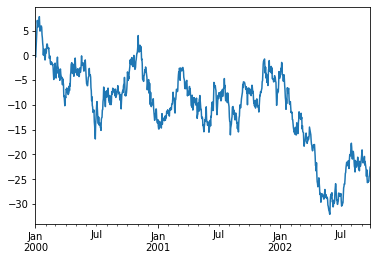

In [143]:
ts.plot()

In [144]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"])
df

,A,B,C,D
2000-01-01,1.438142,-0.089420,-1.020183,-0.007038
2000-01-02,-2.270442,1.002814,-0.999175,1.519309
2000-01-03,-0.054453,0.643559,-0.907047,0.141454
2000-01-04,-0.176312,2.084545,-0.195578,-0.567493
2000-01-05,-0.101233,1.061379,0.483363,0.634495
...,...,...,...,...
2002-09-22,-0.993037,0.009378,-0.048969,2.860721
2002-09-23,0.515662,-1.364733,-0.332596,-0.237564
2002-09-24,1.211500,0.265415,-0.747182,1.261192
2002-09-25,0.117850,-1.332368,2.697691,0.298752


In [146]:
df = df.cumsum()
df

,A,B,C,D
2000-01-01,1.438142,-0.089420,-1.020183,-0.007038
2000-01-02,-0.832300,0.913393,-2.019357,1.512272
2000-01-03,-0.886753,1.556952,-2.926404,1.653726
2000-01-04,-1.063064,3.641497,-3.121982,1.086233
2000-01-05,-1.164297,4.702876,-2.638620,1.720728
...,...,...,...,...
2002-09-22,26.338264,-15.757895,8.528707,68.383255
2002-09-23,26.853926,-17.122629,8.196111,68.145691
2002-09-24,28.065426,-16.857214,7.448929,69.406883
2002-09-25,28.183277,-18.189582,10.146620,69.705635


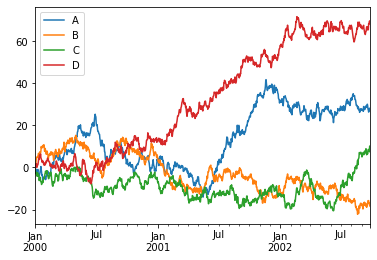

In [147]:
df.plot()

#### Cumsum

In [148]:
# Objasnjenje cumsuma-a
df = pd.DataFrame({"A":[5, 3, 6, 4], 
                   "B":[11, 2, 4, 3], 
                   "C":[4, 3, 8, 5], 
                   "D":[5, 4, 2, 8]}) 
df 

,A,B,C,D
0,5,11,4,5
1,3,2,3,4
2,6,4,8,2
3,4,3,5,8


In [150]:
df = df.cumsum(axis = 0) 
df

,A,B,C,D
0,5,11,4,5
1,8,13,7,9
2,14,17,15,11
3,18,20,20,19


In [151]:
df = pd.DataFrame({"A":[5, 3, 6, 4], 
                   "B":[11, 2, 4, 3], 
                   "C":[4, 3, 8, 5], 
                   "D":[5, 4, 2, 8]}) 
df 

,A,B,C,D
0,5,11,4,5
1,3,2,3,4
2,6,4,8,2
3,4,3,5,8


In [152]:
df = df.cumsum(axis = 1) 
df

,A,B,C,D
0,5,16,20,25
1,3,5,8,12
2,6,10,18,20
3,4,7,12,20


#### Napredne tehnike

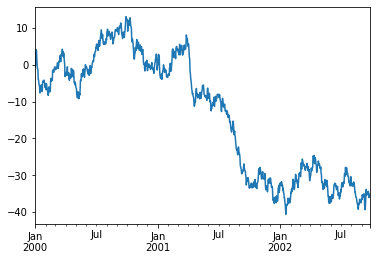

In [171]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot()

In [175]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
df = df.cumsum()
df

,A,B,C,D
2000-01-01,1.361208,0.595348,0.176790,-1.973129
2000-01-02,1.658610,0.341650,0.200541,-3.925799
2000-01-03,0.042367,2.748878,-1.385532,-2.973371
2000-01-04,2.470624,2.292476,-1.154948,-3.705385
2000-01-05,3.464605,2.379267,0.482317,-4.052499
...,...,...,...,...
2002-09-22,-17.471297,3.631613,-41.713847,-43.014218
2002-09-23,-19.508699,2.527269,-40.663910,-44.236162
2002-09-24,-20.337213,3.087942,-41.475737,-46.132393
2002-09-25,-20.092355,3.358975,-40.155184,-46.749691


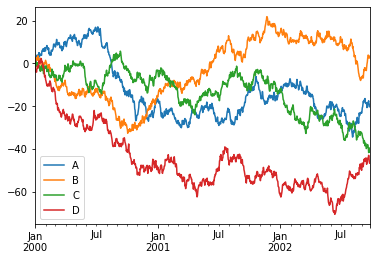

In [176]:
df.plot()

In [173]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=["B", "C"]).cumsum()
df3["A"] = pd.Series(list(range(len(df))))
df3

,B,C,A
0,-0.421193,-1.682206,0
1,0.019323,-1.150195,1
2,0.096470,0.852069,2
3,0.918540,1.399681,3
4,2.174964,2.199061,4
...,...,...,...
995,12.951591,-23.884869,995
996,13.698924,-22.407118,996
997,14.049624,-21.843486,997
998,14.266976,-22.064130,998


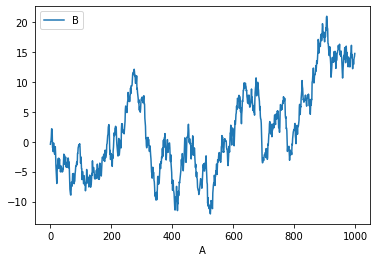

In [174]:
df3.plot(x="A", y="B");

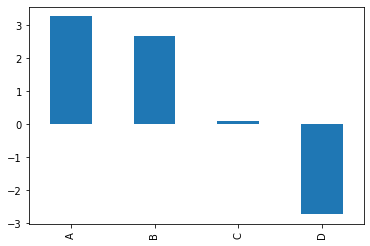

In [177]:
df.iloc[5].plot(kind="bar");

In [178]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
df2

,a,b,c,d
0,0.726518,0.082874,0.054747,0.473059
1,0.492044,0.299136,0.334306,0.477468
2,0.285897,0.564590,0.346930,0.185945
3,0.117446,0.806028,0.205210,0.624447
4,0.660599,0.604849,0.719533,0.314686
5,0.051210,0.703408,0.496329,0.705205
6,0.416478,0.214890,0.325560,0.829222
7,0.958029,0.228296,0.978484,0.746046
8,0.472261,0.876318,0.924209,0.299763
9,0.986149,0.717604,0.996984,0.413163


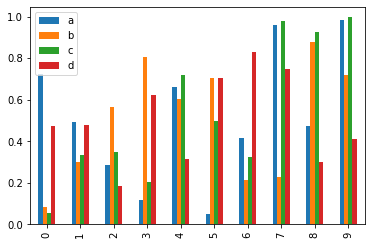

In [179]:
df2.plot.bar()

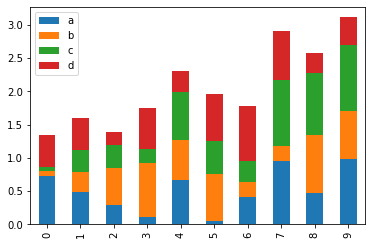

In [180]:
df2.plot.bar(stacked=True);

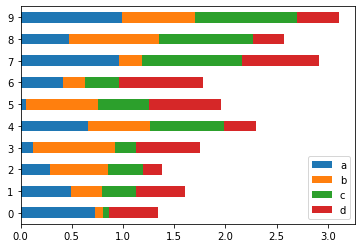

In [181]:
df2.plot.barh(stacked=True);

In [182]:
df4 = pd.DataFrame(
   {
   "a": np.random.randn(1000) + 1,
   "b": np.random.randn(1000),
   "c": np.random.randn(1000) - 1,
   },
   columns=["a", "b", "c"],)
df4

,a,b,c
0,2.882712,-0.470240,-1.288734
1,1.348016,0.622482,-0.604124
2,0.317715,-0.688676,-0.572682
3,2.408610,-0.496384,-1.203841
4,1.067341,-2.451086,-1.853668
...,...,...,...
995,0.425079,0.298646,-0.095826
996,1.225802,-0.746661,-0.359882
997,-0.652893,-1.979844,1.641448
998,0.387607,-0.801017,0.239869


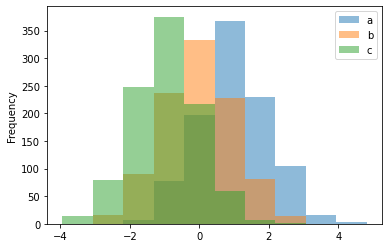

In [183]:
df4.plot.hist(alpha=0.5);

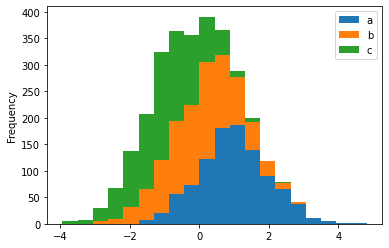

In [184]:
df4.plot.hist(stacked=True, bins=20);

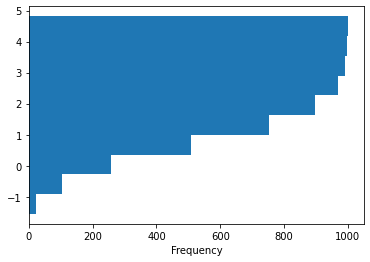

In [185]:
df4["a"].plot.hist(orientation="horizontal", cumulative=True);

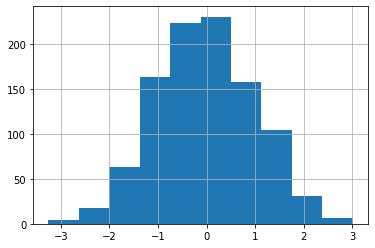

In [186]:
df["A"].diff().hist();

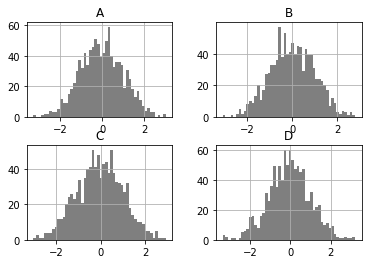

In [187]:
df.diff().hist(color="k", alpha=0.5, bins=50);

In [188]:
data = pd.Series(np.random.randn(1000))
data

0     -0.827978
1     -0.728595
2      1.043541
3     -0.525646
4      0.937877
         ...   
995    0.273091
996    0.415973
997    1.499957
998    0.228135
999    0.460454
Length: 1000, dtype: float64

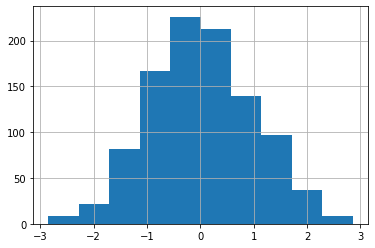

In [189]:
data.hist(figsize=(6, 4));

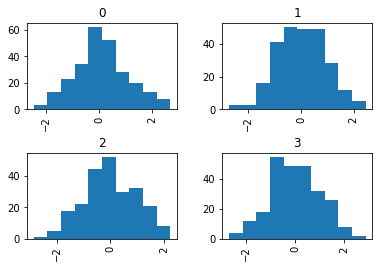

In [190]:
data.hist(by=np.random.randint(0, 4, 1000), figsize=(6, 4));

In [191]:
np.random.randint(0, 4, 1000)

array([3, 1, 0, 3, 3, 2, 0, 2, 2, 2, 1, 2, 3, 0, 0, 0, 0, 1, 3, 1, 3, 2,
       2, 1, 1, 3, 0, 3, 2, 3, 0, 1, 3, 1, 2, 0, 0, 1, 0, 3, 1, 2, 1, 1,
       1, 2, 1, 3, 1, 3, 0, 2, 1, 3, 0, 2, 2, 1, 3, 0, 3, 0, 0, 2, 0, 3,
       0, 2, 3, 2, 1, 2, 3, 2, 1, 3, 1, 2, 0, 0, 3, 0, 0, 2, 2, 2, 2, 2,
       0, 3, 0, 1, 2, 3, 2, 3, 1, 2, 2, 0, 3, 2, 2, 2, 1, 0, 3, 2, 2, 1,
       1, 3, 1, 2, 1, 2, 1, 2, 0, 0, 2, 1, 2, 0, 2, 2, 0, 1, 1, 0, 3, 1,
       2, 0, 1, 2, 3, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 0, 2,
       1, 1, 2, 0, 2, 2, 0, 1, 3, 1, 2, 0, 0, 1, 3, 0, 0, 1, 3, 0, 1, 2,
       0, 1, 1, 3, 1, 2, 1, 1, 0, 0, 2, 0, 3, 3, 1, 1, 2, 1, 2, 3, 0, 2,
       2, 3, 0, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 2, 1, 0, 2, 2, 2, 1, 0, 1,
       1, 2, 1, 2, 2, 1, 2, 2, 3, 3, 0, 1, 2, 3, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 3, 2, 1, 3, 0, 1, 1, 3, 3, 1, 1, 0, 2, 0, 1, 2, 3, 3, 3, 2, 1,
       1, 3, 0, 2, 3, 3, 3, 1, 3, 0, 3, 3, 2, 1, 0, 0, 2, 0, 2, 0, 3, 3,
       3, 2, 3, 2, 1, 1, 2, 3, 0, 0, 2, 3, 2, 0, 0,

In [192]:
# Boxplot za vizuelzaciju distribucije
df = pd.DataFrame(np.random.rand(10, 5), columns=["A", "B", "C", "D", "E"])
df

,A,B,C,D,E
0,0.980278,0.791074,0.471474,0.387116,0.460234
1,0.535010,0.756034,0.173571,0.430269,0.987395
2,0.878945,0.635396,0.392653,0.796647,0.086015
3,0.236360,0.453184,0.813847,0.272093,0.801904
4,0.597394,0.030315,0.615457,0.105082,0.450910
5,0.009373,0.621398,0.881660,0.259515,0.547283
6,0.822972,0.342152,0.196133,0.784062,0.400998
7,0.227359,0.680018,0.749508,0.930974,0.554102
8,0.432555,0.431896,0.941525,0.615682,0.322028
9,0.963674,0.182899,0.501490,0.443561,0.936643


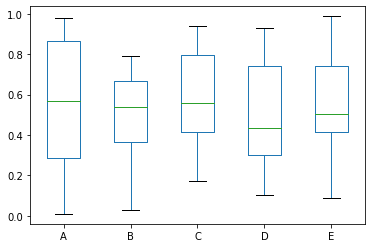

In [193]:
df.plot.box();

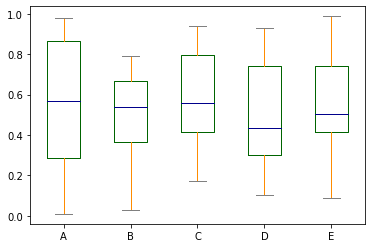

In [194]:
color = {
   "boxes": "DarkGreen",
   "whiskers": "DarkOrange",
   "medians": "DarkBlue",
   "caps": "Gray",
   }
df.plot.box(color=color, sym="r+");

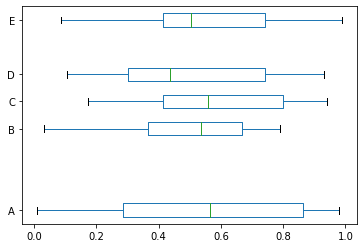

In [195]:
df.plot.box(vert=False, positions=[1, 4, 5, 6, 8]);

In [196]:
# Scatter plot
df = pd.DataFrame(np.random.rand(50, 4), columns=["a", "b", "c", "d"])
df

,a,b,c,d
0,0.969515,0.199790,0.596697,0.869652
1,0.824525,0.748182,0.461903,0.715033
2,0.370420,0.603202,0.715859,0.995080
3,0.904720,0.565417,0.504465,0.413399
4,0.140354,0.840835,0.253678,0.997228
5,0.155607,0.679471,0.093817,0.393661
6,0.997160,0.797046,0.826210,0.241535
7,0.224337,0.920129,0.924057,0.368199
8,0.785468,0.315501,0.302885,0.566035
9,0.416684,0.741108,0.591784,0.119785


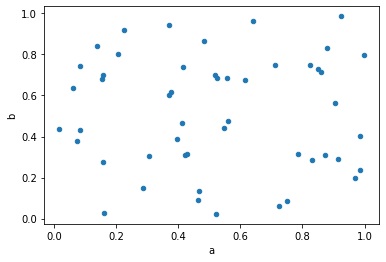

In [197]:
df.plot.scatter(x="a", y="b");

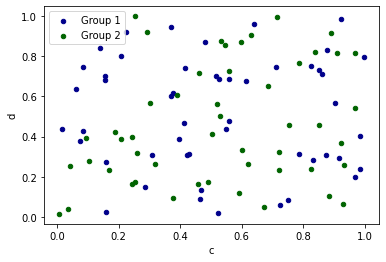

In [198]:
ax = df.plot.scatter(x="a", y="b", color="DarkBlue", label="Group 1")
df.plot.scatter(x="c", y="d", color="DarkGreen", label="Group 2", ax=ax);

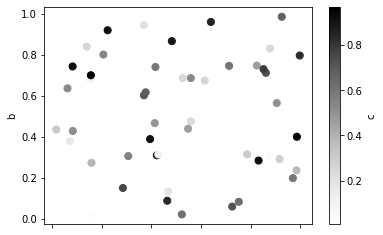

In [199]:
df.plot.scatter(x="a", y="b", c="c", s=50);

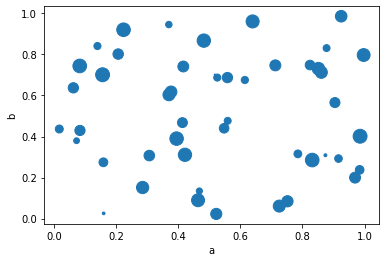

In [200]:
df.plot.scatter(x="a", y="b", s=df["c"] * 200);

In [201]:
# Scatter plot alternativa kada su podaci gusti - hexagonal bin plot
df = pd.DataFrame(np.random.randn(1000, 2), columns=["a", "b"])
df["b"] = df["b"] + np.arange(1000)
df

,a,b
0,-1.131007,0.439276
1,-0.648960,1.282403
2,0.057836,0.690914
3,-0.514972,2.349339
4,0.864850,2.279293
...,...,...
995,-0.414389,997.300536
996,0.637443,994.596844
997,-0.436858,996.363328
998,-1.082680,997.657502


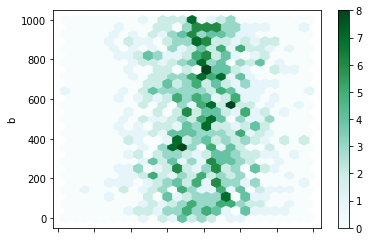

In [202]:
df.plot.hexbin(x="a", y="b", gridsize=25);

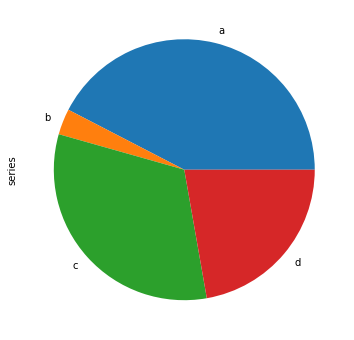

In [203]:
# Pie plot
series = pd.Series(3 * np.random.rand(4), index=["a", "b", "c", "d"], name="series")
series.plot.pie(figsize=(6, 6));

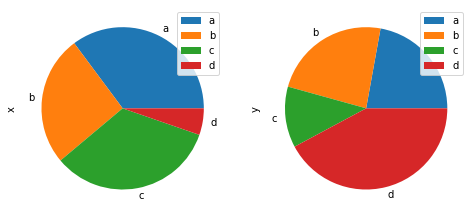

In [204]:
df = pd.DataFrame(3 * np.random.rand(4, 2), index=["a", "b", "c", "d"], columns=["x", "y"])
df.plot.pie(subplots=True, figsize=(8, 4));

In [205]:
series = pd.Series([0.1] * 4, index=["a", "b", "c", "d"], name="series2")
series

a    0.1
b    0.1
c    0.1
d    0.1
Name: series2, dtype: float64

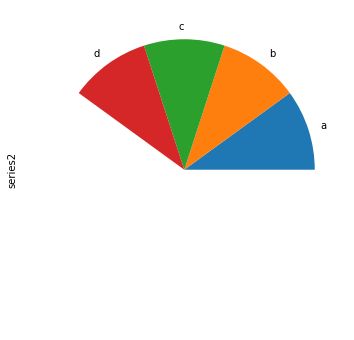

In [206]:
series.plot.pie(figsize=(6, 6));

In [207]:
# Density plot
ser = pd.Series(np.random.randn(1000))
ser

0      0.236418
1     -0.903261
2      0.002485
3      0.949083
4      1.069675
         ...   
995    0.365214
996    1.817254
997   -0.670055
998    1.311701
999   -0.653923
Length: 1000, dtype: float64

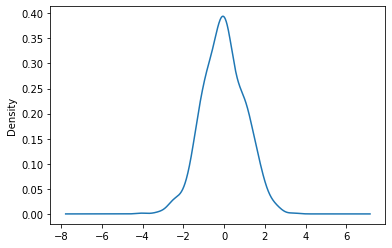

In [208]:
ser.plot.kde();

## Zadatak 1.

Dat je CSV fajl koji sadrži informacije o tačkama: ime (predstavljeno velikim slovom engleske abecede), x i y koordinate (celi brojevi između 0 i 49) i boju tačke. Boja tačke može biti crvena, žuta ili plava, ili može imati nedostajuću vrednost.

### 1. Učitati CSV fajl i prikazati ga. Koliko tacaka sadrzi?

In [153]:
points = pd.read_csv('./points.csv')
points

,Point,x,y,Color
0,A,37,34,red
1,B,1,12,NaN
2,C,6,37,NaN
3,D,32,11,yellow
4,E,8,30,yellow
5,F,19,10,NaN
6,G,21,44,yellow
7,H,21,43,NaN
8,I,2,5,yellow
9,J,14,33,red


In [154]:
print('CSV fajl sadrzi', points.shape[0], 'unosa')

CSV fajl sadrzi 26 unosa


In [155]:
points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Point   26 non-null     object
 1   x       26 non-null     int64 
 2   y       26 non-null     int64 
 3   Color   18 non-null     object
dtypes: int64(2), object(2)
memory usage: 960.0+ bytes


### 2. Obrisati sve nedostajajuce vrednosti.

In [156]:
# axis = 0 odbacuje redove, a axis = 1 kolone
# how = 'any' brise vrstu/kolonu ukoliko ima bar jednu NaN vrednost
# how = 'all' brise vrstu/kolonu ukoliko su sve vrednosti jednake NaN
# podrazumevane vrednosti su 0 i 'any'
points = points.dropna(axis = 0, how = 'any')

In [157]:
points.shape

(18, 4)

In [158]:
points

,Point,x,y,Color
0,A,37,34,red
3,D,32,11,yellow
4,E,8,30,yellow
6,G,21,44,yellow
8,I,2,5,yellow
9,J,14,33,red
10,K,1,31,red
11,L,13,25,blue
13,N,11,16,blue
14,O,43,28,red


### 3. Izdvojiti tacke kod kojih je x koordinata manja od 30.

In [159]:
points[points['x'] < 30]

,Point,x,y,Color
4,E,8,30,yellow
6,G,21,44,yellow
8,I,2,5,yellow
9,J,14,33,red
10,K,1,31,red
11,L,13,25,blue
13,N,11,16,blue
16,Q,1,41,red
18,S,2,37,red
23,X,16,2,red


### 4. Izdvojiti tacke koje su zute boje.

In [160]:
points[points['Color'] == 'yellow']

,Point,x,y,Color
3,D,32,11,yellow
4,E,8,30,yellow
6,G,21,44,yellow
8,I,2,5,yellow
17,R,45,49,yellow


### 5. Izdvojiti tacke kod kojih je x koordinata manja od 30 i koje su zute boje.

In [161]:
points[(points['x'] < 30) & (points['Color'] == 'yellow')]

,Point,x,y,Color
4,E,8,30,yellow
6,G,21,44,yellow
8,I,2,5,yellow


In [162]:
# Prethodni uslov se moze citkije zapisati sa:
x_less_30 = points['x'] < 30
collor_yellow = points['Color'] == 'yellow'

points[x_less_30 & collor_yellow]

,Point,x,y,Color
4,E,8,30,yellow
6,G,21,44,yellow
8,I,2,5,yellow


### 6. Izdvojiti tacke kod kojih je x koordinata manja od 30 i koje su nisu zute boje.

In [163]:
points[x_less_30 & ~collor_yellow]

,Point,x,y,Color
9,J,14,33,red
10,K,1,31,red
11,L,13,25,blue
13,N,11,16,blue
16,Q,1,41,red
18,S,2,37,red
23,X,16,2,red


### 7. Odrediti koliko ima tačaka koje su obojene određenom bojom. Rezultat grafički pikazati pomoću pitice.

In [164]:
import matplotlib.pyplot as plt

In [165]:
p = points['Color'].value_counts()
print(p)

red       10
yellow     5
blue       3
Name: Color, dtype: int64


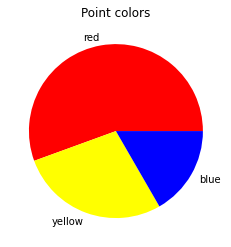

In [166]:
plt.title('Point colors')
plt.pie(p, labels=p.index, colors = p.index)
plt.show()

### 8. Izdvojiti tačke koje su crvene ili čije su obe koordinate manje od 10.italicized text

In [167]:
is_red = points['Color'] == 'red'
x_less_5 = points['x'] < 10
y_less_5 = points['y'] < 10
points[is_red | x_less_5 & y_less_5]

,Point,x,y,Color
0,A,37,34,red
8,I,2,5,yellow
9,J,14,33,red
10,K,1,31,red
14,O,43,28,red
16,Q,1,41,red
18,S,2,37,red
19,T,37,45,red
21,V,43,24,red
23,X,16,2,red


### 9. Pomeriti sve tacke za 5 duz x ose.

In [168]:
points['x'] = points['x'].apply(lambda v: v + 5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [169]:
points

,Point,x,y,Color
0,A,42,34,red
3,D,37,11,yellow
4,E,13,30,yellow
6,G,26,44,yellow
8,I,7,5,yellow
9,J,19,33,red
10,K,6,31,red
11,L,18,25,blue
13,N,16,16,blue
14,O,48,28,red


### 10. Ovako dobijeni skup tačaka sačuvati u posebnom CSV fajlu.

In [170]:
points.to_csv('./translated_points.csv')

## Zadatak 2.

Analizirati [2010-2012 American Community Survey Public Use Microdata Sample Files Now Available](https://www.census.gov/newsroom/press-releases/2014/cb14-tps12.html)

### 1. Preuzeti podatke

In [210]:
download_url = (
   "https://raw.githubusercontent.com/fivethirtyeight/"
   "data/master/college-majors/recent-grads.csv"
)
df = pd.read_csv(download_url)
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


### 2. Prikazati atribute "P25th", "Median", "P75th"

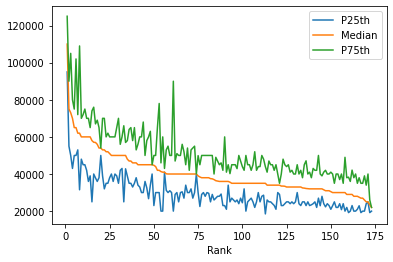

In [211]:
df.plot(x="Rank", y=["P25th", "Median", "P75th"])

### 3. Prikaati histogram atributa "Median"

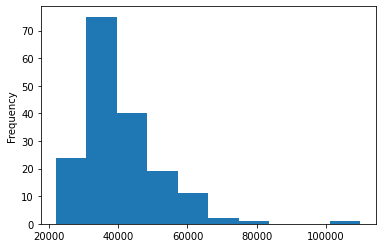

In [212]:
df["Median"].plot(kind="hist")

### 4. Identifikovati outlajere u odnosu na atribut Median

In [214]:
top_5 = df.sort_values(by="Median", ascending=False).head()
top_5

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


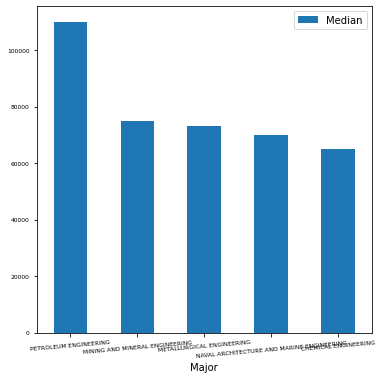

In [227]:
top_5.plot(x="Major", y="Median", kind="bar", rot=5, fontsize=6, figsize=(6, 6))

### 5. Izdvojiti sve koijma je prosecna plata iznad 60 000$


In [228]:
top_medians = df[df["Median"] > 60000].sort_values("Median")

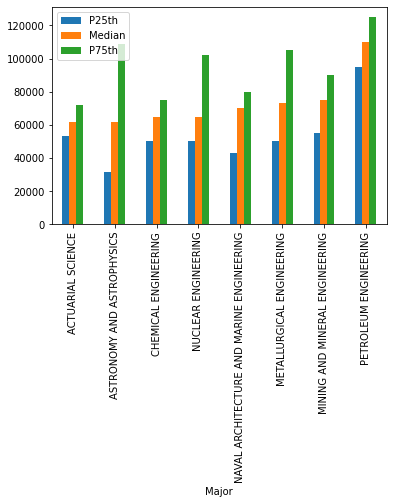

In [229]:
top_medians.plot(x="Major", y=["P25th", "Median", "P75th"], kind="bar")

### 6. Prikazati korelaciju atributa "Median" i "Unemployment_rate"

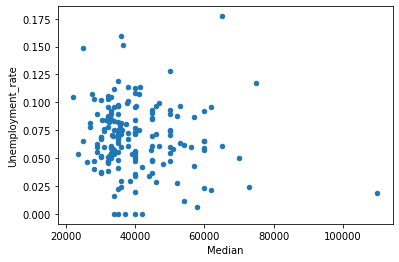

In [230]:
df.plot(x="Median", y="Unemployment_rate", kind="scatter")

# Resources

* [1] [https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

* [2] [https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

* [3] [https://realpython.com/pandas-plot-python/](https://realpython.com/pandas-plot-python/)

